In [5]:
import torch
from dataset.utils import *
from losses import *
from utils import *
from net.resnet import *
from net.googlenet import *
from net.bn_inception import *
from net.pfe import *
from train import train_model
import pytorch_metric_learning as pml

In [6]:
def redefine_train_parameters():
    global device, epochs, learning_rate, loss_lr, num_classes, embedding_size
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 20
    learning_rate = 0.001
    loss_lr = 0.01
    num_classes = get_num_classes(train_dataset)
    embedding_size = 512

In [7]:
batch_size = 512
train_dataset = make_dataset('LFW', split='train', image_size=100)
test_dataset = make_dataset('LFW', split='test', image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Files already downloaded and verified
Files already downloaded and verified


In [36]:
fetch_time(train_loader)

0.13792657852172852

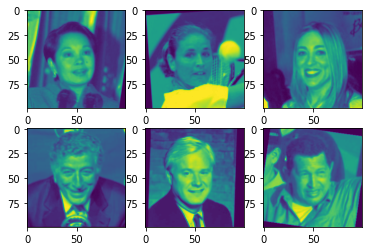

In [11]:
display_images(train_loader, h=2,w=3)

In [53]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00      19.0
          23       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       3.0
          28       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       1.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
evaluate_cos(model, test_loader)

100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


R@1 : 6.122
R@2 : 8.630
R@4 : 12.352
R@8 : 16.559
R@16 : 21.737
R@32 : 27.157


[0.06121898597626753,
 0.08629989212513485,
 0.12351672060409924,
 0.16558791801510248,
 0.21736785329018338,
 0.2715749730312837]

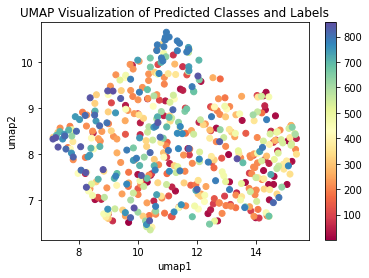

In [55]:
visualize_umap(model, test_loader)

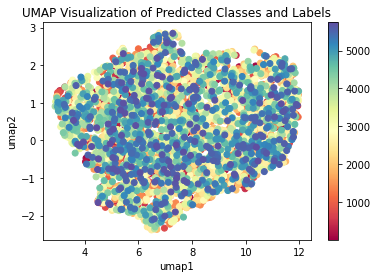

In [56]:
visualize_umap(model, test_loader, mode=2)

In [6]:
model = train_model(model_name='resnet50',
                    loss_func_name='cross_entropy',
                    embedding_size=num_classes,
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw_crossentropy.ptm',
                    verbose=2)

Step: [10/19] Epoch [1/20] Loss: 4.5506 Time: 7.0467
Step: [19/19] Epoch [1/20] Loss: 8.6372 Time: 13.1146
Epoch [1/20] Loss: 8.6372 Time: 13.1160
Step: [10/19] Epoch [2/20] Loss: 4.5155 Time: 20.4619
Step: [19/19] Epoch [2/20] Loss: 8.5672 Time: 26.6060
Epoch [2/20] Loss: 8.5672 Time: 26.6073
Step: [10/19] Epoch [3/20] Loss: 4.4911 Time: 33.6735
Step: [19/19] Epoch [3/20] Loss: 8.5291 Time: 39.7859
Epoch [3/20] Loss: 8.5291 Time: 39.7872
Step: [10/19] Epoch [4/20] Loss: 4.4773 Time: 46.8370
Step: [19/19] Epoch [4/20] Loss: 8.4986 Time: 52.8805
Epoch [4/20] Loss: 8.4986 Time: 52.8825
Step: [10/19] Epoch [5/20] Loss: 4.4596 Time: 60.0410
Step: [19/19] Epoch [5/20] Loss: 8.4636 Time: 66.1616
Epoch [5/20] Loss: 8.4636 Time: 66.1634
Step: [10/19] Epoch [6/20] Loss: 4.4351 Time: 73.1659
Step: [19/19] Epoch [6/20] Loss: 8.4169 Time: 79.2372
Epoch [6/20] Loss: 8.4169 Time: 79.2393
Step: [10/19] Epoch [7/20] Loss: 4.4113 Time: 86.2205
Step: [19/19] Epoch [7/20] Loss: 8.3761 Time: 92.5197
Epoch

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


R@1 : 27.778
R@2 : 32.120
R@4 : 36.974
R@8 : 42.287
R@16 : 47.573
R@32 : 52.157


[0.2777777777777778,
 0.32119741100323623,
 0.3697411003236246,
 0.4228694714131607,
 0.47572815533980584,
 0.5215749730312838]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


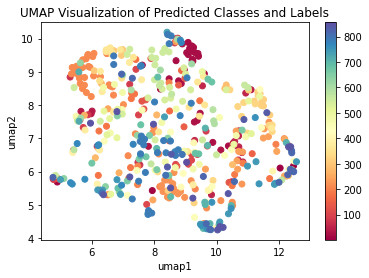

In [8]:
visualize_umap(model, test_loader)

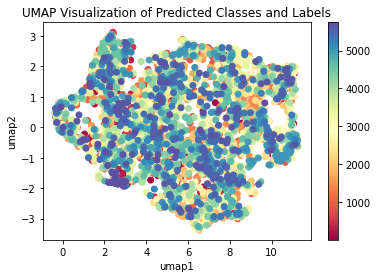

In [9]:
visualize_umap(model, test_loader, mode=2)

In [47]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    use_loss_optimizer=True,
                    save_path='./saved_models/resnet50_lfw_proxy_library.ptm')

Step: [10/75] Epoch [1/20] Loss: 1.4652 Time: 1.8942
Step: [20/75] Epoch [1/20] Loss: 2.8836 Time: 3.7813
Step: [30/75] Epoch [1/20] Loss: 4.3009 Time: 5.6355
Step: [40/75] Epoch [1/20] Loss: 5.7010 Time: 7.5350
Step: [50/75] Epoch [1/20] Loss: 7.1188 Time: 9.4040
Step: [60/75] Epoch [1/20] Loss: 8.5091 Time: 11.2880
Step: [70/75] Epoch [1/20] Loss: 9.8989 Time: 13.1717
Step: [75/75] Epoch [1/20] Loss: 10.5611 Time: 14.0231
Epoch [1/20] Loss: 10.5611 Time: 14.0236
Step: [10/75] Epoch [2/20] Loss: 1.0503 Time: 15.8746
Step: [20/75] Epoch [2/20] Loss: 2.0723 Time: 17.7736
Step: [30/75] Epoch [2/20] Loss: 3.1251 Time: 19.6647
Step: [40/75] Epoch [2/20] Loss: 4.2831 Time: 21.5287
Step: [50/75] Epoch [2/20] Loss: 5.3920 Time: 23.4030
Step: [60/75] Epoch [2/20] Loss: 6.5305 Time: 25.3621
Step: [70/75] Epoch [2/20] Loss: 7.6386 Time: 27.3513
Step: [75/75] Epoch [2/20] Loss: 8.1618 Time: 28.2000
Epoch [2/20] Loss: 8.1618 Time: 28.2004
Step: [10/75] Epoch [3/20] Loss: 0.9668 Time: 30.1102
Step:

Step: [20/75] Epoch [18/20] Loss: 1.0002 Time: 238.7695
Step: [30/75] Epoch [18/20] Loss: 1.4958 Time: 240.6046
Step: [40/75] Epoch [18/20] Loss: 1.9880 Time: 242.4417
Step: [50/75] Epoch [18/20] Loss: 2.4839 Time: 244.2970
Step: [60/75] Epoch [18/20] Loss: 2.9873 Time: 246.1510
Step: [70/75] Epoch [18/20] Loss: 3.4890 Time: 247.9911
Step: [75/75] Epoch [18/20] Loss: 3.7297 Time: 248.8162
Epoch [18/20] Loss: 3.7297 Time: 248.8166
Step: [10/75] Epoch [19/20] Loss: 0.4726 Time: 250.7536
Step: [20/75] Epoch [19/20] Loss: 0.9472 Time: 252.6497
Step: [30/75] Epoch [19/20] Loss: 1.4359 Time: 254.4997
Step: [40/75] Epoch [19/20] Loss: 1.9232 Time: 256.3419
Step: [50/75] Epoch [19/20] Loss: 2.4036 Time: 258.1915
Step: [60/75] Epoch [19/20] Loss: 2.8748 Time: 260.0387
Step: [70/75] Epoch [19/20] Loss: 3.3545 Time: 261.8799
Step: [75/75] Epoch [19/20] Loss: 3.5739 Time: 262.6830
Epoch [19/20] Loss: 3.5739 Time: 262.6834
Step: [10/75] Epoch [20/20] Loss: 0.4669 Time: 264.5209
Step: [20/75] Epoch 

In [57]:
model = torch.load('./saved_models/resnet50_lfw_proxy_library.ptm')
# evaluate_accuracy(model, test_loader)

In [5]:
evaluate_cos(model, test_loader)

100%|██████████| 29/29 [00:04<00:00,  6.92it/s]


R@1 : 2.400
R@2 : 4.072
R@4 : 6.203
R@8 : 9.412
R@16 : 13.808
R@32 : 18.797


[0.02400215749730313,
 0.040722761596548,
 0.06202804746494067,
 0.09412081984897519,
 0.13807982740021574,
 0.18797195253505933]

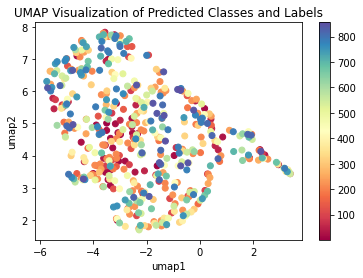

In [58]:
visualize_umap(model, test_loader)

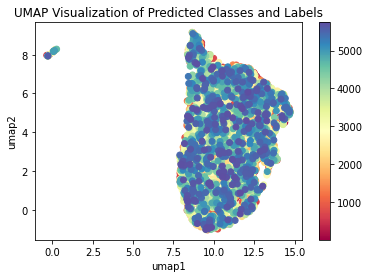

In [59]:
visualize_umap(model, test_loader, mode=2)

In [48]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw_pfe.ptm',
                    verbose=2)

Step: [10/19] Epoch [1/20] Loss: -1504.7220 Time: 8.3879
Step: [19/19] Epoch [1/20] Loss: -2860.5727 Time: 16.0654
Epoch [1/20] Loss: -2860.5727 Time: 16.0662
Step: [10/19] Epoch [2/20] Loss: -1505.5444 Time: 24.1738
Step: [19/19] Epoch [2/20] Loss: -2860.6768 Time: 31.3686
Epoch [2/20] Loss: -2860.6768 Time: 31.3690
Step: [10/19] Epoch [3/20] Loss: -1505.9852 Time: 39.8831
Step: [19/19] Epoch [3/20] Loss: -2860.6245 Time: 47.3716
Epoch [3/20] Loss: -2860.6245 Time: 47.3719
Step: [10/19] Epoch [4/20] Loss: -1506.3255 Time: 55.9661
Step: [19/19] Epoch [4/20] Loss: -2861.1138 Time: 63.4713
Epoch [4/20] Loss: -2861.1138 Time: 63.4715
Step: [10/19] Epoch [5/20] Loss: -1505.1615 Time: 72.1812
Step: [19/19] Epoch [5/20] Loss: -2860.2131 Time: 79.6689
Epoch [5/20] Loss: -2860.2131 Time: 79.6700
Step: [10/19] Epoch [6/20] Loss: -1505.8519 Time: 87.8740
Step: [19/19] Epoch [6/20] Loss: -2861.7233 Time: 95.3719
Epoch [6/20] Loss: -2861.7233 Time: 95.3723
Step: [10/19] Epoch [7/20] Loss: -1505.85

In [49]:
model = torch.load('./saved_models/resnet50_lfw_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [50]:
evaluate_cos(model, test_loader)

100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


R@1 : 5.852
R@2 : 8.738
R@4 : 12.567
R@8 : 17.098
R@16 : 22.681
R@32 : 28.074


[0.05852211434735707,
 0.08737864077669903,
 0.1256742179072276,
 0.1709816612729234,
 0.22680690399137002,
 0.2807443365695793]

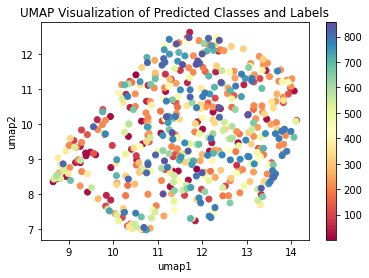

In [51]:
visualize_umap(model, test_loader)

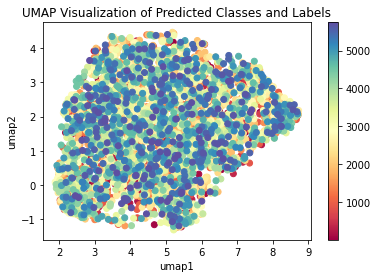

In [52]:
visualize_umap(model, test_loader, mode=2)

In [7]:
batch_size = 128
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

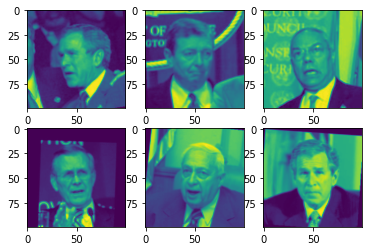

In [64]:
display_images(train_loader, h=2,w=3)

In [8]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      25.0
           1       0.00      0.00      0.00      77.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00     174.0
           4       0.00      0.00      0.00      35.0
           5       0.00      0.00      0.00      23.0
           6       0.00      0.00      0.00      17.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00      17.0
           9       0.00      0.00      0.00      19.0
         139       0.00      0.00      0.00       0.0
         175       0.00      0.00      0.00       0.0
         207       0.00      0.00      0.00       0.0
         278       0.00      0.00      0.00       0.0
         287       0.00      0.00      0.00       0.0
         335       0.00      0.00      0.00       0.0
         337       0.00      0.00      0.00       0.0
      

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  8.07it/s]


R@1 : 35.811
R@2 : 52.027
R@4 : 69.820
R@8 : 81.081
R@16 : 91.441
R@32 : 97.297


[0.3581081081081081,
 0.5202702702702703,
 0.6981981981981982,
 0.8108108108108109,
 0.9144144144144144,
 0.972972972972973]

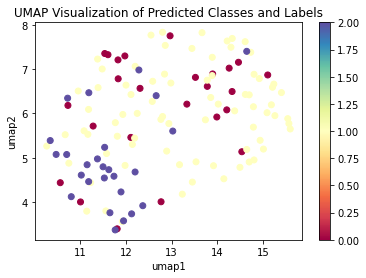

In [11]:
visualize_umap(model, test_loader)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


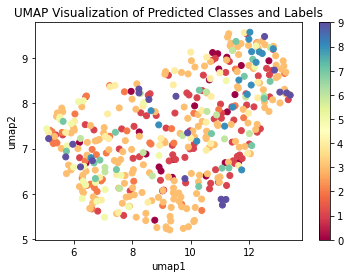

In [9]:
visualize_umap(model, test_loader, mode=2)

In [30]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_proxy.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: 12.1838 Time: 1.5610
Epoch [1/20] Loss: 12.1838 Time: 1.5613
Step: [8/8] Epoch [2/20] Loss: 9.9717 Time: 2.9285
Epoch [2/20] Loss: 9.9717 Time: 2.9291
Step: [8/8] Epoch [3/20] Loss: 7.8293 Time: 4.2647
Epoch [3/20] Loss: 7.8293 Time: 4.2650
Step: [8/8] Epoch [4/20] Loss: 5.8099 Time: 5.6134
Epoch [4/20] Loss: 5.8099 Time: 5.6137
Step: [8/8] Epoch [5/20] Loss: 5.8611 Time: 6.9280
Epoch [5/20] Loss: 5.8611 Time: 6.9283
Step: [8/8] Epoch [6/20] Loss: 5.5383 Time: 8.2993
Epoch [6/20] Loss: 5.5383 Time: 8.2996
Step: [8/8] Epoch [7/20] Loss: 3.0057 Time: 9.6443
Epoch [7/20] Loss: 3.0057 Time: 9.6448
Step: [8/8] Epoch [8/20] Loss: 1.3915 Time: 11.0096
Epoch [8/20] Loss: 1.3915 Time: 11.0099
Step: [8/8] Epoch [9/20] Loss: 1.1999 Time: 12.3790
Epoch [9/20] Loss: 1.1999 Time: 12.3795
Step: [8/8] Epoch [10/20] Loss: 1.2447 Time: 13.7463
Epoch [10/20] Loss: 1.2447 Time: 13.7469
Step: [8/8] Epoch [11/20] Loss: 0.7871 Time: 15.1083
Epoch [11/20] Loss: 0.7871 Time: 15.1

In [12]:
model = torch.load('./saved_models/resnet50_lfw10_proxy.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      25.0
           1       0.00      0.00      0.00      77.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00     174.0
           4       0.00      0.00      0.00      35.0
           5       0.00      0.00      0.00      23.0
           6       0.00      0.00      0.00      17.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00      17.0
           9       0.00      0.00      0.00      19.0
          69       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       0.0
          87       0.00      0.00      0.00       0.0
         122       0.00      0.00      0.00       0.0
         158       0.00      0.00      0.00       0.0
         170       0.00      0.00      0.00       0.0
         223       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  8.35it/s]


R@1 : 96.171
R@2 : 97.072
R@4 : 97.748
R@8 : 97.973
R@16 : 98.198
R@32 : 98.423


[0.9617117117117117,
 0.9707207207207207,
 0.9774774774774775,
 0.9797297297297297,
 0.9819819819819819,
 0.9842342342342343]

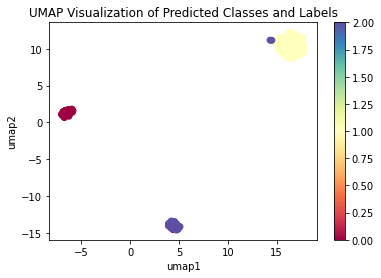

In [13]:
visualize_umap(model, test_loader)

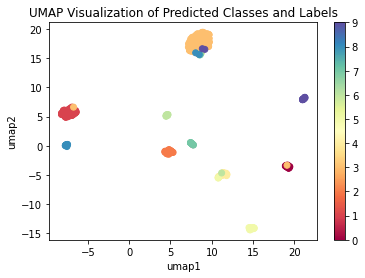

In [15]:
visualize_umap(model, test_loader, mode=2)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_nca',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_proxynca.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: 1.6882 Time: 3.6643
Epoch [1/20] Loss: 1.6882 Time: 3.6645
Step: [8/8] Epoch [2/20] Loss: 1.1319 Time: 5.0414
Epoch [2/20] Loss: 1.1319 Time: 5.0417
Step: [8/8] Epoch [3/20] Loss: 0.9227 Time: 6.3984
Epoch [3/20] Loss: 0.9227 Time: 6.3989
Step: [8/8] Epoch [4/20] Loss: 0.8608 Time: 7.7582
Epoch [4/20] Loss: 0.8608 Time: 7.7584
Step: [8/8] Epoch [5/20] Loss: 0.8290 Time: 9.1238
Epoch [5/20] Loss: 0.8290 Time: 9.1243
Step: [8/8] Epoch [6/20] Loss: 0.7999 Time: 10.4996
Epoch [6/20] Loss: 0.7999 Time: 10.4998
Step: [8/8] Epoch [7/20] Loss: 0.7774 Time: 11.8674
Epoch [7/20] Loss: 0.7774 Time: 11.8676
Step: [8/8] Epoch [8/20] Loss: 0.7585 Time: 13.2442
Epoch [8/20] Loss: 0.7585 Time: 13.2448
Step: [8/8] Epoch [9/20] Loss: 0.7522 Time: 14.5780
Epoch [9/20] Loss: 0.7522 Time: 14.5786
Step: [8/8] Epoch [10/20] Loss: 0.7474 Time: 15.9419
Epoch [10/20] Loss: 0.7474 Time: 15.9424
Step: [8/8] Epoch [11/20] Loss: 0.7474 Time: 17.2833
Epoch [11/20] Loss: 0.7474 Time: 17

In [6]:
model = torch.load('./saved_models/resnet50_lfw10_proxynca.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  7.97it/s]


R@1 : 94.820
R@2 : 97.072
R@4 : 97.072
R@8 : 97.072
R@16 : 97.523
R@32 : 98.874


[0.9481981981981982,
 0.9707207207207207,
 0.9707207207207207,
 0.9707207207207207,
 0.9752252252252253,
 0.9887387387387387]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


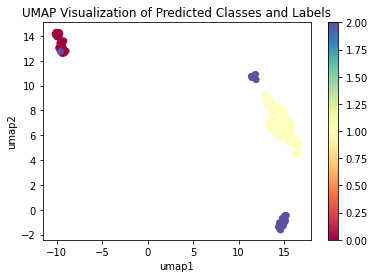

In [8]:
visualize_umap(model, test_loader)

In [10]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_pfe.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: -2860.9854 Time: 1.0999
Epoch [1/20] Loss: -2860.9854 Time: 1.1000
Step: [8/8] Epoch [2/20] Loss: -2855.6241 Time: 2.1836
Epoch [2/20] Loss: -2855.6241 Time: 2.1838
Step: [8/8] Epoch [3/20] Loss: -2857.3814 Time: 3.2862
Epoch [3/20] Loss: -2857.3814 Time: 3.2863
Step: [8/8] Epoch [4/20] Loss: -2855.7820 Time: 4.3725
Epoch [4/20] Loss: -2855.7820 Time: 4.3735
Step: [8/8] Epoch [5/20] Loss: -2857.3299 Time: 5.4237
Epoch [5/20] Loss: -2857.3299 Time: 5.4245
Step: [8/8] Epoch [6/20] Loss: -2857.6403 Time: 6.5250
Epoch [6/20] Loss: -2857.6403 Time: 6.5257
Step: [8/8] Epoch [7/20] Loss: -2855.1029 Time: 7.6253
Epoch [7/20] Loss: -2855.1029 Time: 7.6254
Step: [8/8] Epoch [8/20] Loss: -2854.6685 Time: 8.7158
Epoch [8/20] Loss: -2854.6685 Time: 8.7160
Step: [8/8] Epoch [9/20] Loss: -2859.5835 Time: 9.7895
Epoch [9/20] Loss: -2859.5835 Time: 9.7900
Step: [8/8] Epoch [10/20] Loss: -2859.8184 Time: 10.8711
Epoch [10/20] Loss: -2859.8184 Time: 10.8716
Step: [8/8] Epoc

In [18]:
model = torch.load('./saved_models/resnet50_lfw10_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


R@1 : 31.306
R@2 : 49.775
R@4 : 67.568
R@8 : 81.757
R@16 : 92.117
R@32 : 97.748


[0.3130630630630631,
 0.49774774774774777,
 0.6756756756756757,
 0.8175675675675675,
 0.9211711711711712,
 0.9774774774774775]

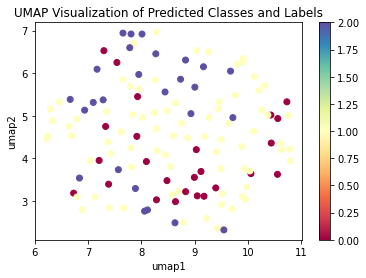

In [13]:
visualize_umap(model, test_loader)

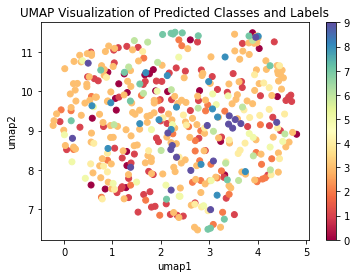

In [19]:
visualize_umap(model, test_loader, mode=2)

In [9]:
batch_size = 512
train_dataset = make_dataset('CIFAR10', split='train')
test_dataset = make_dataset('CIFAR10', split='test')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Files already downloaded and verified
Files already downloaded and verified


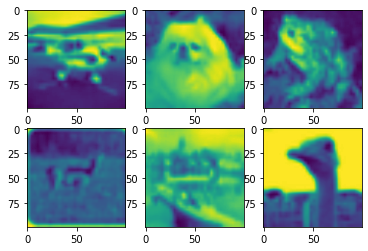

In [6]:
display_images(train_loader, h=2,w=3)

In [22]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.02%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.33      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000
          21       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          45       0.00      0.00      0.00         0
          47       0.00      0.00      0.00         0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
evaluate_cos(model, test_loader)

100%|██████████| 79/79 [00:03<00:00, 19.97it/s]


R@1 : 48.060
R@2 : 63.150
R@4 : 76.630
R@8 : 87.770
R@16 : 94.530
R@32 : 97.990


[0.4806, 0.6315, 0.7663, 0.8777, 0.9453, 0.9799]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


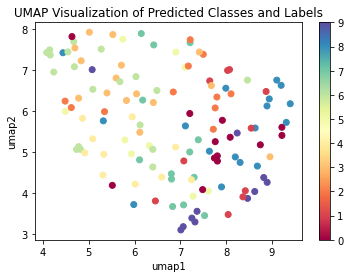

In [7]:
visualize_umap(model, test_loader)

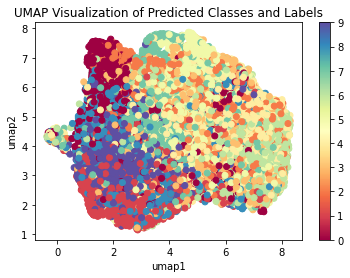

In [23]:
visualize_umap(model, test_loader, mode=2)

In [15]:
model = train_model(model_name='resnet50',
                    loss_func_name='cross_entropy',
                    embedding_size=num_classes,
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_cifar10_crossentropy.ptm',
                    verbose=2)

Step: [10/98] Epoch [1/20] Loss: 0.1887 Time: 3.5861
Step: [20/98] Epoch [1/20] Loss: 0.3576 Time: 6.8626
Step: [30/98] Epoch [1/20] Loss: 0.5243 Time: 10.1413
Step: [40/98] Epoch [1/20] Loss: 0.6886 Time: 13.5730
Step: [50/98] Epoch [1/20] Loss: 0.8527 Time: 16.8497
Step: [60/98] Epoch [1/20] Loss: 1.0155 Time: 20.1292
Step: [70/98] Epoch [1/20] Loss: 1.1767 Time: 23.4104
Step: [80/98] Epoch [1/20] Loss: 1.3377 Time: 26.7042
Step: [90/98] Epoch [1/20] Loss: 1.4982 Time: 29.9884
Step: [98/98] Epoch [1/20] Loss: 1.6272 Time: 32.5004
Epoch [1/20] Loss: 1.6272 Time: 32.5022
Step: [10/98] Epoch [2/20] Loss: 0.1571 Time: 36.1129
Step: [20/98] Epoch [2/20] Loss: 0.3141 Time: 39.3987
Step: [30/98] Epoch [2/20] Loss: 0.4713 Time: 42.6987
Step: [40/98] Epoch [2/20] Loss: 0.6287 Time: 45.9699
Step: [50/98] Epoch [2/20] Loss: 0.7864 Time: 49.2344
Step: [60/98] Epoch [2/20] Loss: 0.9444 Time: 52.5962
Step: [70/98] Epoch [2/20] Loss: 1.1013 Time: 55.8706
Step: [80/98] Epoch [2/20] Loss: 1.2580 Time

Step: [98/98] Epoch [14/20] Loss: 1.4231 Time: 455.1996
Epoch [14/20] Loss: 1.4231 Time: 455.2014
Step: [10/98] Epoch [15/20] Loss: 0.1452 Time: 458.8117
Step: [20/98] Epoch [15/20] Loss: 0.2903 Time: 462.1961
Step: [30/98] Epoch [15/20] Loss: 0.4354 Time: 465.4703
Step: [40/98] Epoch [15/20] Loss: 0.5806 Time: 468.7466
Step: [50/98] Epoch [15/20] Loss: 0.7258 Time: 472.0258
Step: [60/98] Epoch [15/20] Loss: 0.8710 Time: 475.3005
Step: [70/98] Epoch [15/20] Loss: 1.0161 Time: 478.6161
Step: [80/98] Epoch [15/20] Loss: 1.1614 Time: 481.8872
Step: [90/98] Epoch [15/20] Loss: 1.3065 Time: 485.1653
Step: [98/98] Epoch [15/20] Loss: 1.4228 Time: 487.7096
Epoch [15/20] Loss: 1.4228 Time: 487.7113
Step: [10/98] Epoch [16/20] Loss: 0.1452 Time: 491.2969
Step: [20/98] Epoch [16/20] Loss: 0.2903 Time: 494.5691
Step: [30/98] Epoch [16/20] Loss: 0.4354 Time: 497.9736
Step: [40/98] Epoch [16/20] Loss: 0.5808 Time: 501.2468
Step: [50/98] Epoch [16/20] Loss: 0.7259 Time: 504.5246
Step: [60/98] Epoch 

In [11]:
model = torch.load('./saved_models/resnet50_cifar10_crossentropy.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 90.69%
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.97      0.94      0.95      1000
           2       0.88      0.87      0.87      1000
           3       0.82      0.80      0.81      1000
           4       0.88      0.89      0.88      1000
           5       0.85      0.88      0.86      1000
           6       0.94      0.92      0.93      1000
           7       0.94      0.94      0.94      1000
           8       0.95      0.95      0.95      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [16]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:03<00:00,  5.49it/s]


R@1 : 87.930
R@2 : 91.700
R@4 : 94.040
R@8 : 95.310
R@16 : 96.130
R@32 : 96.850


[0.8793, 0.917, 0.9404, 0.9531, 0.9613, 0.9685]

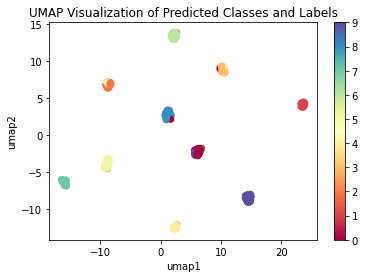

In [17]:
visualize_umap(model, test_loader)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


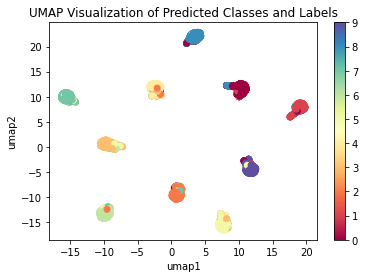

In [23]:
visualize_umap(model, test_loader, mode=2)

In [4]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_cifar10_proxy_library.ptm')

Step: [19/98] Epoch [1/20] Loss: 3.0135 Time: 8.8502
Step: [38/98] Epoch [1/20] Loss: 5.8117 Time: 15.2203
Step: [57/98] Epoch [1/20] Loss: 8.4794 Time: 21.6516
Step: [76/98] Epoch [1/20] Loss: 11.0947 Time: 28.1410
Step: [95/98] Epoch [1/20] Loss: 13.6692 Time: 34.6396
Step: [98/98] Epoch [1/20] Loss: 14.0699 Time: 35.5630
Epoch [1/20] Loss: 14.0699 Time: 35.5656
Step: [19/98] Epoch [2/20] Loss: 2.3132 Time: 42.2465
Step: [38/98] Epoch [2/20] Loss: 4.7124 Time: 48.6924
Step: [57/98] Epoch [2/20] Loss: 7.1101 Time: 55.1664
Step: [76/98] Epoch [2/20] Loss: 9.4780 Time: 61.5809
Step: [95/98] Epoch [2/20] Loss: 11.8300 Time: 67.9389
Step: [98/98] Epoch [2/20] Loss: 12.1862 Time: 68.8354
Epoch [2/20] Loss: 12.1862 Time: 68.8376
Step: [19/98] Epoch [3/20] Loss: 1.9612 Time: 75.4898
Step: [38/98] Epoch [3/20] Loss: 4.1751 Time: 82.0829
Step: [57/98] Epoch [3/20] Loss: 6.4232 Time: 88.5462
Step: [76/98] Epoch [3/20] Loss: 8.5233 Time: 95.0408
Step: [95/98] Epoch [3/20] Loss: 10.6703 Time: 101

In [25]:
model = torch.load('./saved_models/resnet50_cifar10_proxy_library.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1000.0
           1       0.00      0.00      0.00    1000.0
           2       0.00      0.00      0.00    1000.0
           3       0.00      0.00      0.00    1000.0
           4       0.00      0.00      0.00    1000.0
           5       0.00      0.00      0.00    1000.0
           6       0.00      0.00      0.00    1000.0
           7       0.00      0.00      0.00    1000.0
           8       0.00      0.00      0.00    1000.0
           9       0.00      0.00      0.00    1000.0
          10       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       0.0
          32       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       0.0
          48       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:03<00:00,  5.06it/s]


R@1 : 91.370
R@2 : 94.010
R@4 : 95.770
R@8 : 96.710
R@16 : 97.360
R@32 : 97.920


[0.9137, 0.9401, 0.9577, 0.9671, 0.9736, 0.9792]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


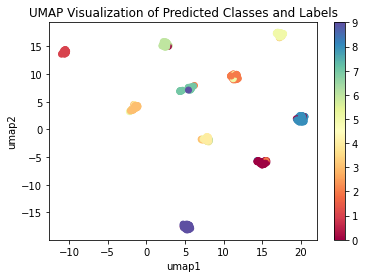

In [7]:
visualize_umap(model, test_loader)

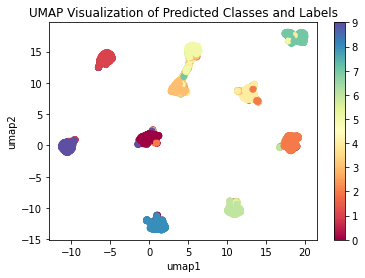

In [26]:
visualize_umap(model, test_loader, mode=2)

In [11]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=0.1,
                    save_path='./saved_models/resnet50_cifar10_pfe.ptm',
                    verbose=2)

Step: [10/98] Epoch [1/20] Loss: -290.8155 Time: 4.2154
Step: [20/98] Epoch [1/20] Loss: -581.4770 Time: 8.5884
Step: [30/98] Epoch [1/20] Loss: -872.3425 Time: 13.0200
Step: [40/98] Epoch [1/20] Loss: -1163.2768 Time: 17.5195
Step: [50/98] Epoch [1/20] Loss: -1454.1605 Time: 21.9160
Step: [60/98] Epoch [1/20] Loss: -1744.8276 Time: 26.2883
Step: [70/98] Epoch [1/20] Loss: -2035.6491 Time: 30.6112
Step: [80/98] Epoch [1/20] Loss: -2326.4372 Time: 35.1158
Step: [90/98] Epoch [1/20] Loss: -2617.2891 Time: 39.5880
Step: [98/98] Epoch [1/20] Loss: -2850.0031 Time: 42.9353
Epoch [1/20] Loss: -2850.0031 Time: 42.9386
Step: [10/98] Epoch [2/20] Loss: -290.8084 Time: 47.4278
Step: [20/98] Epoch [2/20] Loss: -581.6589 Time: 51.8099
Step: [30/98] Epoch [2/20] Loss: -872.3808 Time: 56.1210
Step: [40/98] Epoch [2/20] Loss: -1163.3141 Time: 60.4258
Step: [50/98] Epoch [2/20] Loss: -1454.2631 Time: 64.7886
Step: [60/98] Epoch [2/20] Loss: -1745.0746 Time: 69.0888
Step: [70/98] Epoch [2/20] Loss: -20

Step: [10/98] Epoch [14/20] Loss: -290.7911 Time: 559.4202
Step: [20/98] Epoch [14/20] Loss: -581.5240 Time: 563.7884
Step: [30/98] Epoch [14/20] Loss: -872.3107 Time: 568.0184
Step: [40/98] Epoch [14/20] Loss: -1163.1278 Time: 572.3883
Step: [50/98] Epoch [14/20] Loss: -1453.9572 Time: 576.6317
Step: [60/98] Epoch [14/20] Loss: -1744.8673 Time: 580.9903
Step: [70/98] Epoch [14/20] Loss: -2035.6887 Time: 585.4116
Step: [80/98] Epoch [14/20] Loss: -2326.5589 Time: 589.8257
Step: [90/98] Epoch [14/20] Loss: -2617.4164 Time: 594.2237
Step: [98/98] Epoch [14/20] Loss: -2850.0618 Time: 597.6181
Epoch [14/20] Loss: -2850.0618 Time: 597.6208
Step: [10/98] Epoch [15/20] Loss: -290.7298 Time: 601.9990
Step: [20/98] Epoch [15/20] Loss: -581.6032 Time: 606.3216
Step: [30/98] Epoch [15/20] Loss: -872.4601 Time: 610.7659
Step: [40/98] Epoch [15/20] Loss: -1163.1844 Time: 615.2197
Step: [50/98] Epoch [15/20] Loss: -1453.9695 Time: 619.8229
Step: [60/98] Epoch [15/20] Loss: -1744.9575 Time: 624.2229


In [7]:
model = torch.load('./saved_models/resnet50_cifar10_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [11]:
evaluate_cos(model, test_loader)

100%|██████████| 79/79 [00:04<00:00, 16.70it/s]


R@1 : 46.700
R@2 : 62.470
R@4 : 76.920
R@8 : 87.800
R@16 : 95.080
R@32 : 98.420


[0.467, 0.6247, 0.7692, 0.878, 0.9508, 0.9842]

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:04<00:00,  4.47it/s]


R@1 : 46.760
R@2 : 62.340
R@4 : 76.810
R@8 : 88.440
R@16 : 95.070
R@32 : 98.520


[0.4676, 0.6234, 0.7681, 0.8844, 0.9507, 0.9852]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


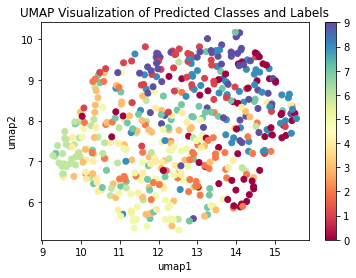

In [13]:
visualize_umap(model, test_loader)

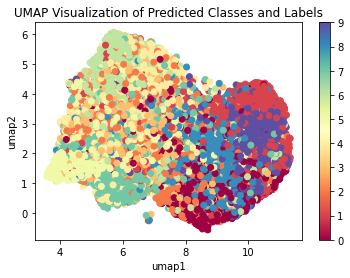

In [14]:
visualize_umap(model, test_loader, mode=2)